In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud as wc

In [25]:
path = os.path.join(os.getcwd(), "..", "param", "ap")
alpha_path = os.path.join(path, "alpha.dat")
beta_path = os.path.join(path, "phi.dat")

alpha = pd.read_table(alpha_path, sep=" ", header = None)
beta = pd.read_table(beta_path, sep=" ", header = None)

vocab_path = os.path.join(os.getcwd(), "..", "datasets", "ap", "vocab.txt" )
vocab = pd.read_table(vocab_path, header=None)

In [26]:
alpha

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [27]:
sorted_topics = alpha.transpose().sort_values(0, ascending=False).index
for topic in sorted_topics:
    top_words = beta.loc[topic].sort_values(ascending=False).index
    
    if topic < 10:
        print topic, " :" ,
    else:
        print topic , ":" , 
        
    for i in xrange(30):
        print vocab[0].loc[top_words[i]], 
    print
    print

0  : hostages release anderson red cross hijackers held americans hostage american thursday freed gunmen official kidnapped lebanon released team free freedom statement end hijacking committee four plane bank group two chief

63 : solidarity polish walesa nauvoo jaruzelski poland polands mazowiecki authorities town poles officers gotner d bodies diapers gdansk organs shipyard linda buried warsaw loma missing failed katyn graves died lech bones

73 : drug cocaine drugs fbi agents states enforcement customs federal authorities charges mexican tests illegal attorney united mexico arrested thursday friday medellin law owen trafficking agent officers charged week extradition border

72 : sothebys art dresses auction dress evening short pageant monet suits style dinner clothes wear house boxes leonard henson christies white bought wedding popular show guests second women sold picture cost

71 : dukakis bush campaign democratic republican vice george presidential president convention bentsen 

IOError: [Errno 2] No such file or directory: 'topic_images/topic86.png'

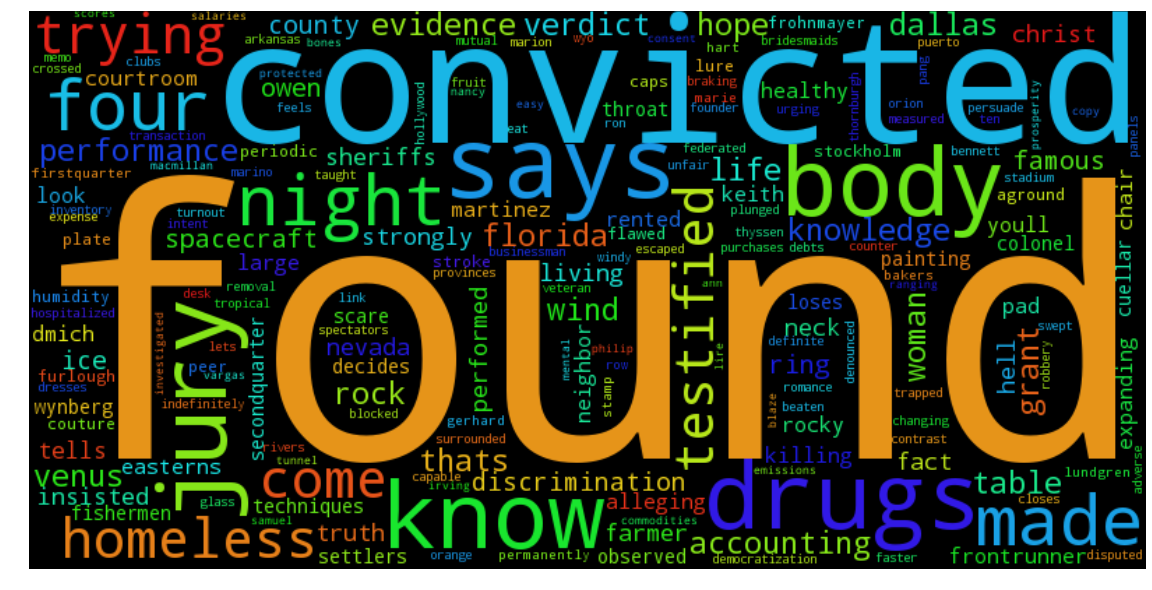

In [15]:
topic = 86
top_words = beta.loc[topic].sort_values(ascending=False).index[0:400]
word_list = []
for word_index in top_words:
    if word_index != 0:
        word_freq = (vocab[0].loc[word_index], beta.loc[topic][word_index].round(5))
        word_list.append(word_freq)
        
plt.figure(figsize=(20,10))
wordcloud = wc.WordCloud(width=800, height=400).generate_from_frequencies(word_list)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("topic_images/topic86.png")
plt.show()

In [6]:
sorted_topics = alpha.transpose().sort_values(0, ascending=False).index
for topic in sorted_topics:
    top_words = beta.loc[topic].sort_values(ascending=False).index[0:400]
    word_list = []
    for word_index in top_words:
        if word_index != 0:
            word_freq = (vocab[0].loc[word_index], beta.loc[topic][word_index].round(5))
            word_list.append(word_freq)
    
    if beta.loc[topic].loc[top_words[0]] - beta.loc[topic].loc[top_words[1]] > 0.01:
        image_name = vocab[0].loc[top_words[0]]
    else:
        image_name = vocab[0].loc[top_words[0]]+"_"+vocab[0].loc[top_words[1]]
        
    plt.figure(figsize=(20,10))
    wordcloud = wc.WordCloud(width=800, height=400).generate_from_frequencies(word_list)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("topic_images2/"+image_name+".png")
    plt.close()